In [47]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [48]:
#Reading data 
data=pd.read_csv("../input/Iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

In [49]:
from tabulate import tabulate

print("\n10 first samples of the dataset:")
print(tabulate(data.head(10), headers='keys', tablefmt='grid', showindex=False))


10 first samples of the dataset:
+------+-----------------+----------------+-----------------+----------------+-------------+
|   Id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | Species     |
+======+=================+================+=================+================+=============+
|    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa |
+------+-----------------+----------------+-----------------+----------------+-------------+
|    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa |
+------+-----------------+----------------+-----------------+----------------+-------------+
|    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa |
+------+-----------------+----------------+-----------------+----------------+-------------+
|    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa |
+------+-----------------+----------

**Visualisation of the dataset**

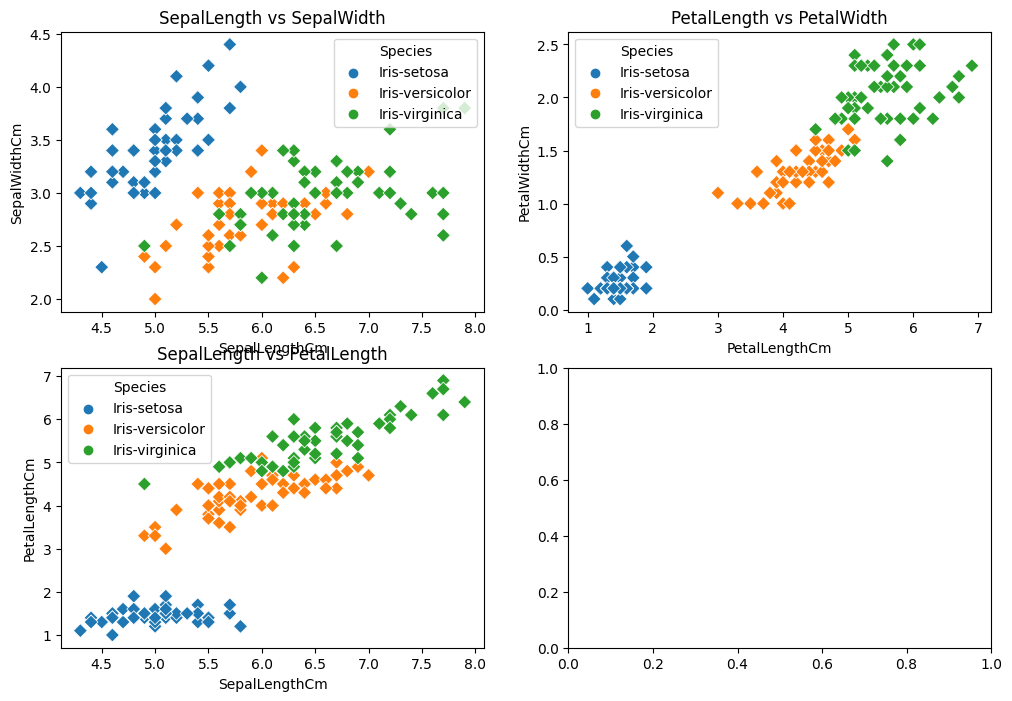

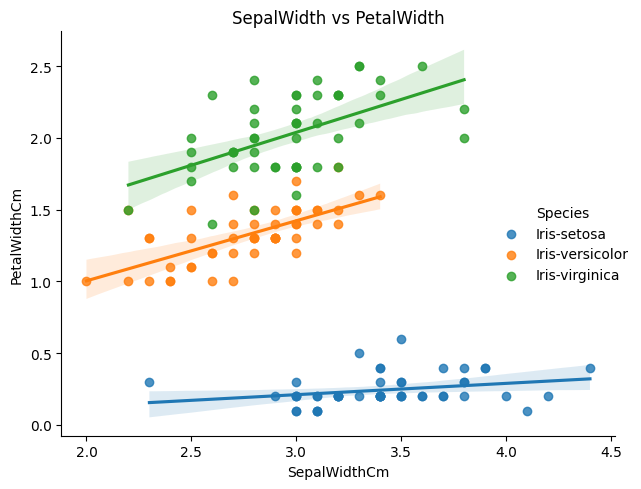

In [50]:
# Create a figure with larger size
plt.figure(figsize=(12, 8))

# First plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', 
                hue="Species", marker="D", s=50)
plt.title('SepalLength vs SepalWidth')

# Second plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', 
                hue="Species", marker="D", s=50)
plt.title('PetalLength vs PetalWidth')

# Third plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', 
                hue="Species", marker="D", s=50)
plt.title('SepalLength vs PetalLength')

# Fourth plot
plt.subplot(2, 2, 4)
sns.lmplot(data=data, x='SepalWidthCm', y='PetalWidthCm', 
                hue="Species")
plt.title('SepalWidth vs PetalWidth')

# Adjust layout
plt.tight_layout()
plt.show()

Coding below convert the species into each respective category to be feed into the neural network

In [51]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [52]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [53]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
64  65            5.6           2.9            3.6           1.3       1
87  88            6.3           2.3            4.4           1.3       1
66  67            5.6           3.0            4.5           1.5       1
21  22            5.1           3.7            1.5           0.4       0
25  26            5.0           3.0            1.6           0.2       0


Converting data to numpy array in order for processing 

In [54]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.6 2.9 3.6 1.3]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.5 1.5]]
Examples of y
 [1 1 1]


**Normalization**

It can be seen from above that the feature of the first dataset has 6cm in Sepal Length, 3.4cm in Sepal Width, 4.5cm in Petal Length and 1.6cm in Petal Width. However, the range of the dataset may be different. Therefore, in order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing 

In [55]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.07748055 0.07676768 0.07083376 0.07476947]
 [0.08716562 0.06088471 0.0865746  0.07476947]
 [0.07748055 0.07941484 0.0885422  0.08627246]]


In [56]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [57]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization


In [58]:
from tensorflow.keras.utils import to_categorical

# Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (120, 3)
Shape of y_test: (30, 3)


In [59]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 1000)                │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 1000)                │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6246 - loss: 1.0881 - val_accuracy: 0.6000 - val_loss: 1.0563
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7663 - loss: 1.0206 - val_accuracy: 0.6000 - val_loss: 0.9604
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6867 - loss: 0.9004 - val_accuracy: 0.6000 - val_loss: 0.8084
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6715 - loss: 0.7262 - val_accuracy: 0.7000 - val_loss: 0.6265
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7771 - loss: 0.5161 - val_accuracy: 0.8000 - val_loss: 0.4497
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9345 - loss: 0.3569 - val_accuracy: 0.9333 - val_loss: 0.3256
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9435 - loss: 0.2934 - val_accuracy: 0.9667 - val_loss: 0.2319
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9767 - loss: 0.2392 - val_accuracy: 0.9667 - val_loss: 0.1851
Epoch 

In [62]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Accuracy of the dataset 100.0


An accuracy of **100%** is achieved in this dataset.It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.


**Further improvement: **

1.Adding batch normalization 

2.Adding dropout layer to prevent overfitting 